<a href="https://www.kaggle.com/code/erayyglr/baseball-salary-prediction?scriptVersionId=202828369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

## Reading in a dataset

In [3]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df = pd.read_csv("/kaggle/input/baseball-dataset/hitters.csv")

In [4]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.00,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.00,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.00,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.00,A


In [5]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    fl

## Missing Values

In [6]:
df.isnull().sum()  # Checking NA values

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)  # percentage of NA's

Salary      18.32
AtBat        0.00
Hits         0.00
Errors       0.00
Assists      0.00
PutOuts      0.00
Division     0.00
League       0.00
CWalks       0.00
CRBI         0.00
CRuns        0.00
CHmRun       0.00
CHits        0.00
CAtBat       0.00
Years        0.00
Walks        0.00
RBI          0.00
Runs         0.00
HmRun        0.00
NewLeague    0.00
dtype: float64

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=10):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category", "bool"]]
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category"] and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols =[col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {cat_cols}")
    print(f"num_cols: {num_cols}")
    print(f"cat_but_car: {cat_but_car}")
    print(f"num_but_car: {num_but_cat}")
    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car =  grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: ['League', 'Division', 'NewLeague']
num_cols: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
cat_but_car: []
num_but_car: []


In [10]:
df = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

In [11]:
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [13]:
df.isnull().sum()  # Checking again NA's

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

In [14]:
df = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)

In [15]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.00,66.00,1.00,30.00,29.00,14.00,1.00,293.00,66.00,1.00,30.00,29.00,14.00,446.00,33.00,20.00,110.40,0.00,0.00,0.00
1,315.00,81.00,7.00,24.00,38.00,39.00,14.00,3449.00,835.00,69.00,321.00,414.00,375.00,632.00,43.00,10.00,475.00,1.00,1.00,1.00
2,479.00,130.00,18.00,66.00,72.00,76.00,3.00,1624.00,457.00,63.00,224.00,266.00,263.00,880.00,82.00,14.00,480.00,0.00,1.00,0.00
3,496.00,141.00,20.00,65.00,78.00,37.00,11.00,5628.00,1575.00,225.00,828.00,838.00,354.00,200.00,11.00,3.00,500.00,1.00,0.00,1.00
4,321.00,87.00,10.00,39.00,42.00,30.00,2.00,396.00,101.00,12.00,48.00,46.00,33.00,805.00,40.00,4.00,91.50,1.00,0.00,1.00


## Outlier's

In [16]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5 * iqr
    up_limit = quartile3 + 1.5 * iqr
    return low_limit, up_limit

In [17]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None)

In [18]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [19]:
def grab_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df.loc[df[col_name] > up_limit, col_name] = up_limit
    df.loc[df[col_name] < low_limit, col_name] = low_limit
for col in num_cols:
    grab_outliers(df, col)

In [20]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [21]:
corr = df.corr(method="spearman")
corr

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.00,0.97,0.57,0.93,0.84,0.70,0.09,0.35,0.37,0.36,0.39,0.38,0.32,0.37,0.28,0.37,0.48,-0.11,-0.04,-0.07
Hits,0.97,1.00,0.57,0.93,0.84,0.69,0.11,0.37,0.39,0.37,0.41,0.40,0.33,0.34,0.25,0.33,0.50,-0.10,-0.06,-0.06
HmRun,0.57,0.57,1.00,0.63,0.82,0.50,0.18,0.32,0.32,0.67,0.35,0.46,0.33,0.21,-0.11,0.04,0.39,-0.15,-0.03,-0.14
Runs,0.93,0.93,0.63,1.00,0.82,0.76,0.07,0.32,0.34,0.37,0.39,0.35,0.33,0.30,0.17,0.28,0.46,-0.14,-0.07,-0.10
RBI,0.84,0.84,0.82,0.82,1.00,0.67,0.19,0.40,0.41,0.58,0.43,0.51,0.39,0.29,0.10,0.22,0.50,-0.14,-0.07,-0.11
Walks,0.70,0.69,0.50,0.76,0.67,1.00,0.18,0.37,0.37,0.42,0.41,0.41,0.51,0.30,0.13,0.18,0.47,-0.02,-0.07,-0.01
Years,0.09,0.11,0.18,0.07,0.19,0.18,1.00,0.91,0.90,0.75,0.88,0.88,0.87,-0.04,-0.04,-0.14,0.64,-0.06,-0.01,-0.05
CAtBat,0.35,0.37,0.32,0.32,0.40,0.37,0.91,1.00,1.00,0.84,0.99,0.97,0.95,0.05,0.05,-0.02,0.76,-0.05,-0.02,-0.04
CHits,0.37,0.39,0.32,0.34,0.41,0.37,0.90,1.00,1.00,0.84,0.99,0.97,0.95,0.05,0.04,-0.02,0.77,-0.06,-0.03,-0.04
CHmRun,0.36,0.37,0.67,0.37,0.58,0.42,0.75,0.84,0.84,1.00,0.85,0.92,0.83,0.10,-0.13,-0.09,0.70,-0.10,-0.01,-0.10


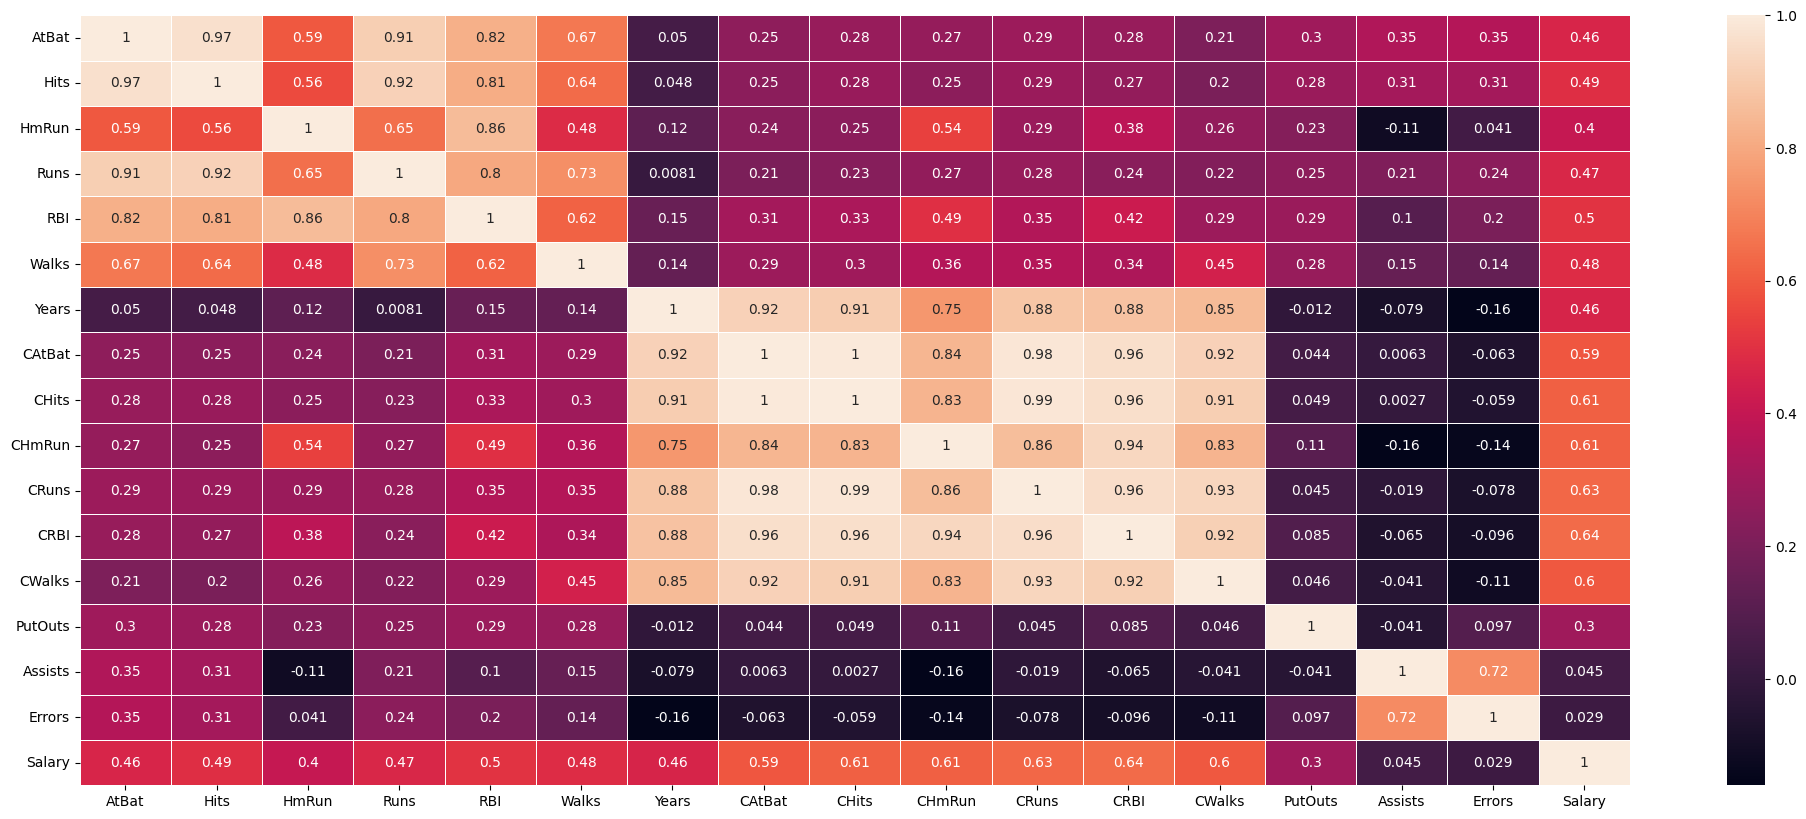

In [22]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [23]:
# Correlation analysis of numerical variables was performed.
def find_correlation(dataframe, numeric_cols, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in numeric_cols:
        if col == "Salary":
            pass
        else:
            correlation = dataframe[[col, "Salary"]].corr().loc[col, "Salary"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df, num_cols)

AtBat 0.46134019463431464
Hits 0.48825771105072147
HmRun 0.40426548543802393
Runs 0.46694852883197013
RBI 0.5046581327118848
Walks 0.48334929104970625
Years 0.45690070394908633
CAtBat 0.5880832124755897
CHits 0.612379590582914
CHmRun 0.6133493421907159
CRuns 0.6297118036030623
CRBI 0.638055680293615
CWalks 0.5964046248168631
PutOuts 0.2998961937233038
Assists 0.04532912288099638
Errors 0.029470856506648446


In [24]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [25]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [26]:
num_cols = [col for col in num_cols if 'Salary' not in col]

ss = StandardScaler()

df[num_cols] = ss.fit_transform(df[num_cols])  # Gives same results with the above for loop

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.57,-0.76,-1.13,-0.81,-0.73,-1.15,-1.32,-1.04,-1.04,-0.96,-1.02,-1.00,-1.04,1.05,-0.55,1.98,110.40,0.00,0.00,0.00
1,-0.43,-0.43,-0.43,-1.04,-0.38,0.01,1.35,0.37,0.20,0.12,-0.10,0.36,0.58,2.06,-0.47,0.34,475.00,1.00,1.00,1.00
2,0.64,0.62,0.84,0.58,0.92,1.73,-0.91,-0.45,-0.41,0.02,-0.41,-0.16,0.08,2.15,-0.17,0.99,480.00,0.00,1.00,0.00
3,0.75,0.86,1.07,0.54,1.15,-0.08,0.73,1.34,1.40,2.25,1.50,1.86,0.49,-0.29,-0.72,-0.81,500.00,1.00,0.00,1.00
4,-0.39,-0.30,-0.09,-0.46,-0.23,-0.40,-1.11,-1.00,-0.98,-0.78,-0.97,-0.94,-0.95,2.15,-0.49,-0.65,91.50,1.00,0.00,1.00


## Modelling

In [27]:
y = df["Salary"]
X = df.drop(["Salary"], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [30]:
reg_model.coef_

array([ -39.69785514,   69.92648961,   24.80911057,   24.35869629,
        -36.74417242,   21.5455316 ,  -18.85264634, -984.27078618,
        893.12119959,   54.11510897,   48.40178526,  221.22519144,
         28.38708224,   72.85426895,   44.69841587,  -28.47575208,
         93.19101048,  -52.42794494,  -65.22710055])

In [31]:
reg_model.intercept_

512.5830910516561

In [32]:
y_pred = reg_model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 75107.25602771355
R-squared: 0.5030365941620777


In [34]:
reg_model.score(X_train, y_train)

0.6151149675106423

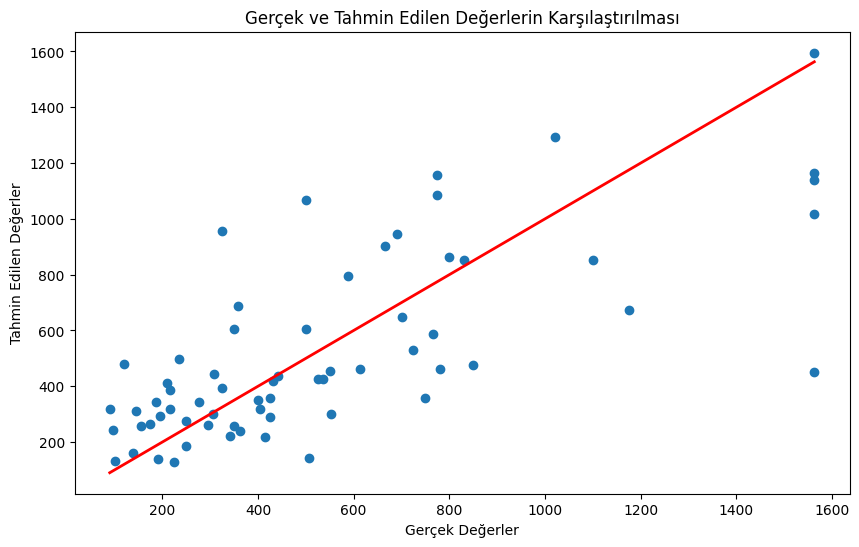

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()